In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [6]:
adata=sc.read_csv('goolam_imputed_t.csv',delimiter=',', first_column_names=None, dtype='float32')

In [7]:
adata.X.shape

(124, 10057)

In [8]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

sc.pp.scale(adata, max_value=10)

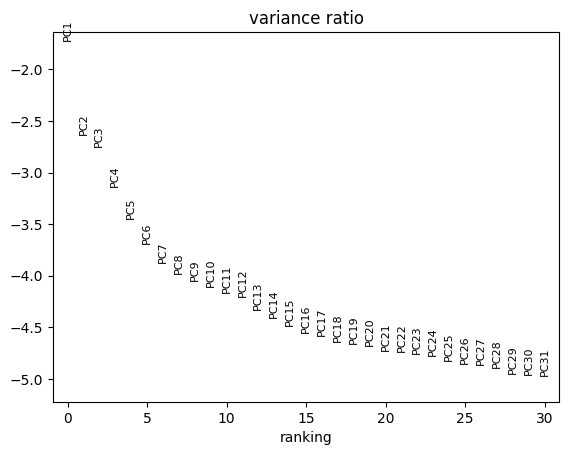

In [9]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [10]:
#create neighborhood graph using 20 pcs 
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
##dim reduction using umap
sc.tl.umap(adata)
#Leiden clustering
#import leidenalg
#sc.tl.leiden(adata2)
##visualizing clusters
#sc.pl.umap(adata2, color=['leiden'])

/home/zaman/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


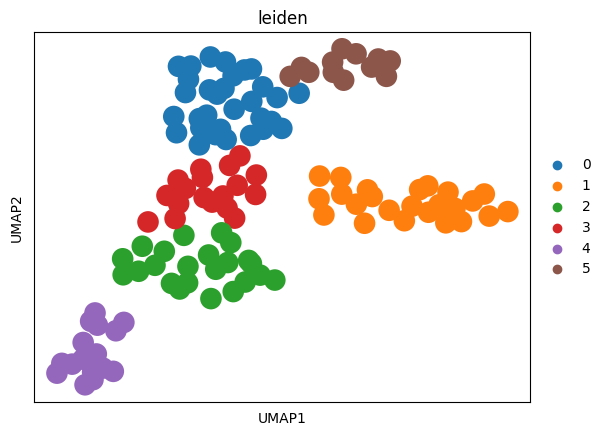

In [11]:
import leidenalg
sc.tl.leiden(adata)
##visualizing clusters
sc.pl.umap(adata, color=['leiden'])

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil = silhouette_score(adata.X, adata.obs['leiden'],metric='euclidean')
sil

0.04966286

In [13]:
adata.obs['leiden']

0      4
1      4
2      4
3      4
4      4
      ..
119    1
120    1
121    1
122    1
123    1
Name: leiden, Length: 124, dtype: category
Categories (6, object): ['0', '1', '2', '3', '4', '5']

In [14]:
import pandas as pd
import numpy as np
l1=np.genfromtxt('goolam_annotation.txt',dtype=None, delimiter=",")
l2=adata.obs['leiden']

/tmp/ipykernel_4207/3726941761.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  l1=np.genfromtxt('goolam_annotation.txt',dtype=None, delimiter=",")


In [15]:
l1

array([b'2cell', b'2cell', b'2cell', b'2cell', b'2cell', b'2cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'8cell', b'8cell',
       b'8cell', b'8cell', b'8cell', b'8cell', b'8cell', b'8cell',
       b'8cell', b'8cell', b'8cell', b'8cell', b'8cell', b'8cell',
       b'8cell', b'8cell', b'16cell', b'16cell', b'16cell', b'16cell',
       b'16cell', b'16cell', b'blast', b'blast', b'blast', b'blast',
       b'blast', b'blast', b'8cell', b'8cell', b'8cell', b'8cell',
       b'8cell', b'8cell', b'8cell', b'8cell', b'8cell', b'8cell',
       b'8cell', b'8cell', b'8cell', b'8cell', b'8cell',

In [16]:
l2

0      4
1      4
2      4
3      4
4      4
      ..
119    1
120    1
121    1
122    1
123    1
Name: leiden, Length: 124, dtype: category
Categories (6, object): ['0', '1', '2', '3', '4', '5']

In [17]:
from sklearn import metrics
ari=metrics.adjusted_rand_score(l1,l2)
ari

0.5317163634627068